# Trabajo Práctico N° 4
## INTERPOLACIÓN

### 2) Implemente el método de Newton.

In [13]:
#Cargar diferencias divididas
"""
Carga en el arreglo 'd' las n-1 diferencias divididas
x: arreglo de nodos
d: arreglo de abscisas de los nodos
n: (n<= x.size) numero de diferencias divididas  
"""
def difDiv(x,d,n):
    for i in range(n):
        for j in range(n-1,i,-1):
            d[j]=(d[j]-d[j-1])/(x[j]-x[j-1-i])
    return d

#Polinomio interpolante
def polinomio(x,d,n,a):
    suma = 0
    e = 1
    for i in range(n):
        suma = suma + e*d[i]
        e = e*(a-x[i])
    return suma

# Mostrar polinomio: P3(x) = f[xo] + ...
def mostrar(x,d,n):
    cadena = "P"+str(n)+"(x) = "+str(d[0])
    for i in range(1,n):
        cadena = cadena+" + "+'{:.1f}'.format(d[i])
        for k in range(i):
            cadena = cadena + "*(x-"+'{:<.0f}'.format(x[k])+")"
    return cadena
        

In [14]:
x = np.array([  4.,   -4,    7,   6,  2])
d = np.array([278., -242, 1430, 980, 40])
n = x.size
a = 5
d = np.copy(difDiv(x,d,n))
y = polinomio(x,d,n,a)
print("Diferencias divididas: ", d,"\n")
print("y(%d) = "%a, y,"\n")
print("Polinomio:")
print(mostrar(x,d,n))


Diferencias divididas:  [278.   65.   29.    0.4  -0.9] 

y(5) =  580.5999999999999 

Polinomio:
P5(x) = 278.0 + 65.0*(x-4) + 29.0*(x-4)*(x--4) + 0.4*(x-4)*(x--4)*(x-7) + -0.9*(x-4)*(x--4)*(x-7)*(x-6)


### 3) Utilizando las funciones provistas por Scipy, interpolar los puntos del borde superior de la figura mediante interpolación de trazadores cúbicos o cubic spline. Explique la función utilizada. ¿Cuáles son los parámetros entrada y qué da por resultado?

Representación de trazos cúbicos (k=3) con las funciones splev y splrep 

**splrep:**  Dado el conjunto de puntos, determina una aproximación spline suave del grado k en el intervalo xb <= x <= xe.

*scipy.interpolate.splrep(x, y, w=None, xb=None, xe=None, k=3, task=0, s=None, t=None, full_output=0, per=0, quiet=1)*

Devuelve los coeficientes de los polinomios y puntos de cortes de una función especial definida por tramos.

**splev:** Dados los nodos y coeficientes de la función, evalúa el valor del polinomio.

*Este es un envoltorio de las rutinas splev y splder del paquete FITPACK de FORTRAN.

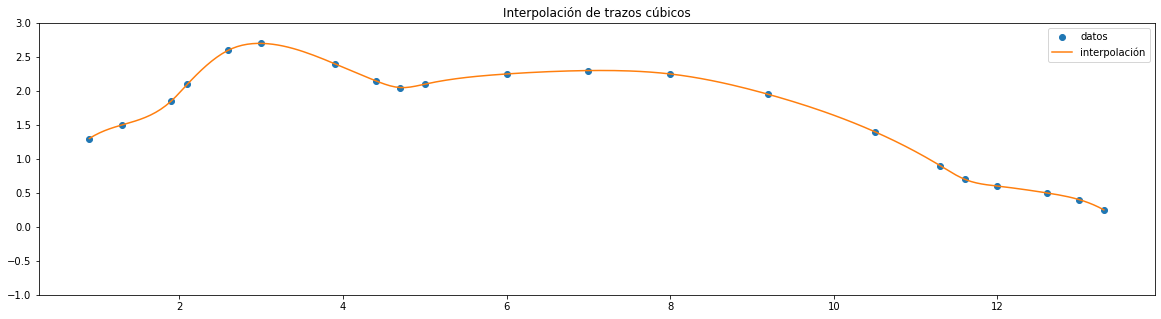

In [15]:
import numpy as np
from scipy.interpolate import splev, splrep
import matplotlib.pyplot as plt

px = np.array([0.9,1.3,1.9,2.1,2.6,3,3.9,4.4,4.7,5,6,7,8,9.2,10.5,11.3,11.6,12,12.6,13,13.3])
py = np.array([1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25])

spline = splrep(px,py)
x = np.linspace(px[0],px[-1],200)
y = splev(x,spline)

plt.figure(1, (20, 5))
plt.plot(px, py,'o',label='datos')
plt.plot(x, y, label='interpolación')
plt.ylim(-1,3)
plt.title("Interpolación de trazos cúbicos")
plt.legend()
plt.show()

**CubicSpline** Dado el conjunto de puntos, interpola los datos con un polinomio cúbico definido por partes. El resultado se representa como una instancia de **PPoly** (Polinomio por partes en términos de coeficientes y puntos de corte) con puntos de interrupción que coinciden con los datos proporcionados.

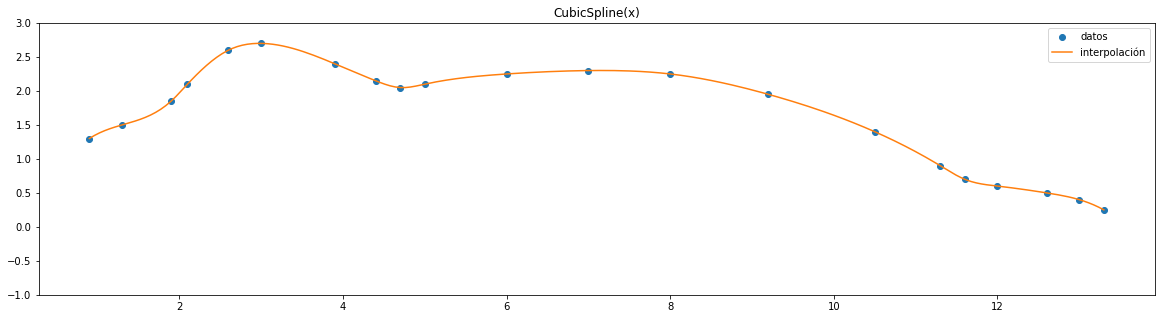

In [16]:
from scipy.interpolate import CubicSpline

f = CubicSpline(px,py)
x = np.linspace(px[0],px[-1],200)

plt.figure(1, (20, 5))
plt.plot(px, py,'o',label='datos')
plt.plot(x, f(x), label='interpolación')
plt.ylim(-1,3)
plt.title("CubicSpline(x)")
plt.legend()
plt.show()

In [17]:
f(1)

array(1.36838325)

In [18]:
splev(1,spline)

array(1.36838325)

In [30]:
x = np.flip(np.array([4.,6.,7,2,-4]))
d = np.flip(np.array([278.,980.,1430,40,-242]))
n = x.size
d = np.copy(difDiv(x,d,n))

for i in range(n):
    a = polinomio(x,d,i+1,5)
    if i+1 < n:
        b = abs(a - polinomio(x,d,i+2,5))
    else:
        b = 0
    print(i, a, "e = ",b)

0 -242.0 e =  423.0
1 181.0 e =  567.0
2 748.0 e =  118.79999999999995
3 629.2 e =  48.60000000000002
4 580.6 e =  0


In [20]:
x = np.array([0.33333,  -2,   2.08333,  2.66667,  -0.83333, -0.25,  0.91667])
y = np.array([-0.57063, -41.93782,  49.20195, 151.81511,  -2.67378, -1.35019, 2.04083])
n = x.size
a = 0
d = np.copy(difDiv(x,y,n))
f = polinomio(x,d,n,a)
print("Diferencias divididas: ", y,"\n")
print("y(%d) = "%a, f,"\n")

Diferencias divididas:  [-0.57063    17.72882104  2.62350906 12.98045629  2.11446905  0.9841464
  0.03441003] 

y(0) =  -1.0962457438373023 



In [22]:
help(difDiv)

Help on function difDiv in module __main__:

difDiv(x, d, n)

